In [1]:
import numpy as np
import os

In [2]:
from firefly.data_reader import ArrayReader

don't have phil's colormaps


In [3]:
from firefly.data_reader import FIREreader,SimpleFIREreader,TweenParams
from abg_python.galaxy.gal_utils import Galaxy

In [4]:
import sys

In [5]:
sys.path.insert(0, '/Users/ageller/VISUALIZATIONS/Firefly')
sys.path.insert(0,'/Users/agurvich/research/repos/firefly/src')

In [7]:
galaxy = Galaxy('m12b_res57000',600)
galaxy.extractMainHalo(use_saved_subsnapshots=False)

Couldn't find a metadata file... for
 Metadata object at /Users/agurvich/scratch/data/metal_diffusion/m12b_res57000/metadata/meta_Galaxy_600.hdf5
Tracing the rockstar halo files with fancy:True and None Gyr smoothing.
No rstar 1/2 in halo or metadata files, we will need to calculate it ourselves.
Loading star particles of m12b_res57000 at 600 at /Users/agurvich/snaps/metal_diffusion/m12b_res57000/output
Failed to open saved sub-snapshots AssertionError('Told not to use saved sub-snapshots')
Loading gas particles of m12b_res57000 at 600 at /Users/agurvich/snaps/metal_diffusion/m12b_res57000/output
Loading dark matter particles of m12b_res57000 at 600 at /Users/agurvich/snaps/metal_diffusion/m12b_res57000/output
Reorienting...
Done.
extract_halo_inner(m12b_res57000 at 600,){'orient_stars': True, 'use_saved_subsnapshots': False} 10.31 s elapsed
Snapshot memory free


(12.27201256901771,
 True,
 13.610546783496492,
 -23.753615253930974,
 331.60968,
 2.454402513803542,
 140.56429531755958)

In [8]:
## create a FIRE reader object
reader = FIREreader(
    ## path to directory containing (optionally multiple) .hdf5 files
    snapdir = "/Users/agurvich/research/snaps/metal_diffusion/m12b_res57000/output/",
    ## the snapshot number, best to provide separately in order to disambiguate
    snapnum = 600,
    ## particle types one would like to extract from .hdf5 files
    ptypes=[0,4,1,2],
    ## what to call them in the UI
    UInames=['Gas','Stars','HRDM','LRDM'],
    ## by what factor would we like to reduce the data for performance stability and disk space concerns
    decimation_factors=[10,1000,1000,1000],
    ## what fields would we like to extract
    fields=['Density','Temperature','AgeGyr','GCRadius'],
    ## do we want to take the magnitude of any of these fields?
    ## do we want to take the log? 
    logFlags=[True,True,False,False],
    ## which fields do we want to be able to filter on?
    filterFlags=[True,True,True,True],
    ## which fields do we want to be able to colormap by?
    colormapFlags=[True,True,True,True],
    radiusFlags=[False,True,True,False],
    ## where should the output .json files be saved to? 
    ##  if a relative path is given, like here, saves to $HOME/<JSONdir>
    ##  and creates a soft-link to firefly/static/data
    JSONdir=os.path.abspath(os.path.join(os.getcwd(),'..','static','data','FIRESampleData')),
    ## overwrite the existing startup.json file
    write_startup=True,
    clean_JSONdir=True)

## fetch data from .hdf5 files
reader.loadData(
    com=galaxy.scom,
    vcom=galaxy.sub_snap['vscom'])

Loading ptype 2
Loading ptype 1
Loading ptype 4
Loading ptype 0


array([Gas - 622573/6225729 particles - 4 tracked fields,
       Stars - 3265/3264723 particles - 3 tracked fields,
       HRDM - 9324/9323040 particles - 2 tracked fields,
       LRDM - 3043/3042265 particles - 2 tracked fields], dtype=object)

In [20]:
reader.settings['camera'] = [0,0,-1e4]
i=0

In [30]:
dec_factorss = []
dec_factorss += [[1e5,1e6,1e6,1e6]]
dec_factorss += [[1e4,1e6,1e6,1e6]]
dec_factorss += [[1e3,1e6,1e6,1e6]]
dec_factorss += [[1e2,1e6,1e6,1e6]]
dec_factorss += [[1e1,1e6,1e6,1e6]]
dec_factorss += [[1e0,1e6,1e6,1e6]]
dec_factorss += [[1e0,1e0,1e6,1e6]]
dec_factorss += [[1e0,1e0,2e0,1e6]]
dec_factorss += [[1e0,1e0,1e0,1e6]]
dec_factorss += [[1e0,1e0,1e0,1e0]]

for dec_factors in dec_factorss[i:i+1]:
    ntot = 0
    for dec_factor,pg in zip(dec_factors,reader.particleGroups):
        pg.decimation_factor = int(dec_factor)
        pg.getDecimationIndexArray()
        ntot+=pg.dec_inds.size
    print(ntot,end='\t')
    reader.writeToDisk(extension='.ffly',loud=False)
    ! du -sh ../static/data/FIRESampleData
    i+=1

21855757	727M	../static/data/FIRESampleData


In [ ]:
77,0.05900001525878906,0.017064056
637,0.08000016212463379,0.018136829
6240,0.10400009155273438,0.023128302
62272,0.21600008010864258,0.062277596
622587,1.2309999465942383,0.220690863
6225744,14.410000085830688,1.212123229
9490464,17.954999923706055,1.701010122
14151975,22.130000114440918,2.442347864
18813495,40.09999990463257,3.232732077

In [74]:
ffly_vals = np.array([line.split(',') for line in """77,0.06599998474121094,0.045062166
637,0.0559999942779541,0.05616036
6240,0.09599995613098145,0.069353025
62272,0.20099997520446777,0.102923956
622587,1.1700000762939453,0.394356318
6225744,14.686000108718872,1.325057611
9490464,16.289999961853027,1.954397825
14151975,18.880000114440918,2.608548307
18813495,31.983999967575073,3.232781232""".split('\n')],dtype=float)



ffly_disk_sizes = np.array([line.split(',') for line in """77,24000
637,48000
6240,264000
62272,2400000
622587,24000000
6225744,238000000
9490464,350000000
14151975,492000000
18813495,635000000""".split('\n')],dtype=int)


json_vals = np.array([line.split(',') for line in """77,0.0559999942779541,0.021532112
637,0.046000003814697266,0.023241817
6240,0.08500003814697266,0.032178145
62272,0.23200011253356934,0.064776421
622587,1.6700000762939453,0.409123759
6225744,18.068000078201294,1.2720236
9490464,21.130000114440918,1.761668701
14151975,28.098999977111816,2.44843447
18813495,56.579999923706055,3.249422113""".split('\n')],dtype=float)



json_disk_sizes = np.array([line.split(',') for line in """77,32000
637,104000
6240,848000
62272,8100000
622587,81000000
6225744,807000000
9490464,1100000000
14151975,1600000000
18813495,2100000000""".split('\n')],dtype=int)

json_disk_sizes
json_vals
ffly_vals
ffly_disk_sizes

array([[       77,     24000],
       [      637,     48000],
       [     6240,    264000],
       [    62272,   2400000],
       [   622587,  24000000],
       [  6225744, 238000000],
       [  9490464, 350000000],
       [ 14151975, 492000000],
       [ 18813495, 635000000]])

In [264]:
from abg_python.plot_utils import plt,nameAxes,bufferAxesLabels,latex_columnwidth,clean_savefig
%matplotlib inline

In [270]:
import os

In [124]:
from abg_python.color_utils import get_distinct

In [126]:
colors = get_distinct(2)

In [128]:
plt.rcParams['font.size']=16

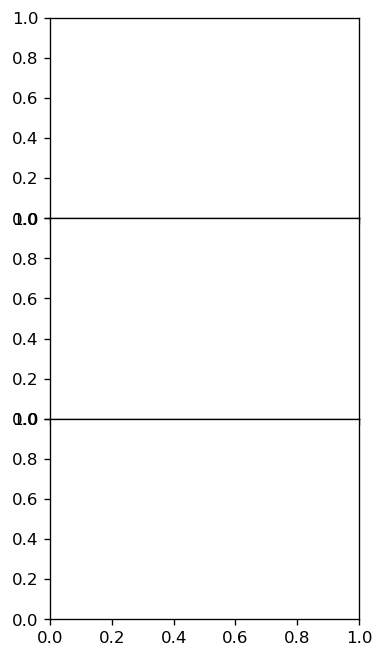

In [289]:
fig,axs = plt.subplots(nrows=3,ncols=1,sharex=True)
fig.subplots_adjust(wspace=0,hspace=0)
fig.set_size_inches(latex_columnwidth,2*latex_columnwidth)
fig.set_dpi(120)

In [290]:
ax = axs[2]
ax.plot(ffly_vals[:,0],ffly_vals[:,1],lw=3,c=colors[0])
ax.plot(json_vals[:,0],json_vals[:,1],lw=3,c=colors[1])
nameAxes(ax,None,'$N_\mathrm{particles}$','time to load [s]',logflag=(1,0))

In [291]:
ax = axs[1]
ax.plot(ffly_vals[:,0],ffly_vals[:,2]*1024,lw=3,c=colors[0])
ax.plot(json_vals[:,0],json_vals[:,2]*1024,lw=3,c=colors[1])
#ax.text(ffly_vals[0,0],ffly_vals[0,2]*1024,'.ffly',va='top')
#ax.text(json_vals[0,0],json_vals[0,2]*1024+3,'.json',va='bottom',ha='left')
nameAxes(ax,None,'$N_\mathrm{particles}$','memory [MB]',
         logflag=(1,1))

saving: /Users/agurvich Desktop/performance.pdf


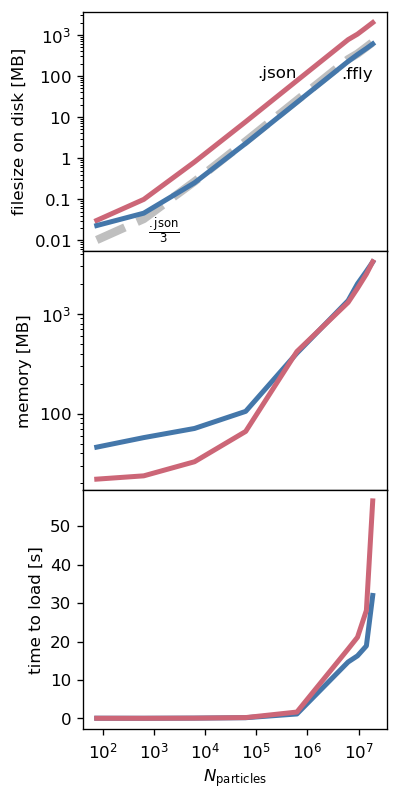

In [292]:
ax = axs[0]

ax.plot(json_disk_sizes[:,0],json_disk_sizes[:,1]/1024**2,label='.json',lw=3,c=colors[1])
ax.plot(json_disk_sizes[:,0],json_disk_sizes[:,1]/1024**2/3,label='.json/3',lw=5,c='gray',alpha=0.5,ls='--')
ax.plot(ffly_disk_sizes[:,0],ffly_disk_sizes[:,1]/1024**2,label='.ffly',lw=3,c=colors[0])

    
ax.text(ffly_disk_sizes[-3,0],ffly_disk_sizes[-3,1]/1024**2/2,'.ffly',va='top',ha='center')
ax.text(json_disk_sizes[-5,0],json_disk_sizes[-5,1]/1024**2,'.json',va='bottom',ha='right')
ax.text(json_disk_sizes[1,0]*1.2,json_disk_sizes[1,1]/1024**2/3*1.2,r'$\frac{\mathrm{.json}}{3}$',va='top',ha='left')
nameAxes(
    ax,
    None,
    '$N_\mathrm{particles}$',
    'filesize on disk [MB]',
    logflag=(1,1))
fig.set_facecolor('white')

ax.set_xticks(10**np.array([2,3,4,5,6,7]))
ax.set_xticklabels(["$10^{%d}$"%power for power in [2,3,4,5,6,7]])
clean_savefig(fig,'Desktop/performance.pdf',latex_columnwidth,latex_columnwidth*2,plotdir=os.environ['HOME'])
fig